<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3<br>
<font color=696880 size=4>
    Ashkan Majidi - Shayan Salehi - Amirhossein Alamdar

____

# Personal Data

In [ ]:
student_number = '400102039'
first_name = 'Mehdikhani'
last_name = 'mohamad Hosein'

# Introduction

In this assignment, you will implement SVM (Support Vector Machines) for classification.


# Data Prepfocessing

Import your needed libraries in following cell.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data from ```satimage``` dataset and split data to features and labels. The ```label``` column is our target variable.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
path = "/content/satimage.csv"
df = pd.read_csv(path)
df.describe()


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,label
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,...,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,6.850000,5.289977,5.307285,4.737998,2.940331,4.226093,10.339083,3.030711,-0.254356,3.535447,...,-0.188990,-0.078644,0.111794,0.033934,-0.162218,-0.102263,0.084639,0.030022,-0.163979,3.434343
std,3.401468,4.160406,3.963320,2.186508,0.437458,4.161181,3.508229,3.551423,5.472431,7.990691,...,0.316521,0.415159,0.452420,0.351670,0.297557,0.418800,0.443048,0.351484,0.297723,1.876139
min,-0.750000,-5.000000,-5.714300,-1.000000,1.967740,-6.000000,0.000000,-7.000000,-12.000000,-16.000000,...,-1.083330,-1.000000,-1.000000,-1.000000,-1.000000,-1.031250,-1.000000,-1.000000,-1.000000,1.000000
25%,4.500000,3.000000,1.904760,3.165287,2.645161,2.000000,7.368420,0.500000,-3.875000,-0.621358,...,-0.416667,-0.353846,-0.128713,-0.263158,-0.375000,-0.375000,-0.145631,-0.263158,-0.390625,2.000000
50%,6.500000,5.909091,5.714286,4.553716,2.903226,4.545455,10.736842,2.750000,-1.031250,4.271852,...,-0.216667,-0.107692,0.148515,0.052632,-0.187500,-0.156250,0.106796,0.052632,-0.187500,3.000000
75%,9.500000,8.818180,8.571430,5.826446,3.290323,7.818180,13.263160,4.812500,3.843750,10.213598,...,-0.033333,0.230769,0.504950,0.326316,-0.015625,0.218750,0.475728,0.326316,-0.015625,5.000000
max,15.500000,15.000000,15.000000,13.000000,4.064520,14.000000,20.000000,17.000000,14.000000,20.000000,...,1.000000,1.000000,1.039600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


Now split data to train, validation and test parts. 60% of data should be used for train, 15% for validation and 25% for test. After that scale the data to Standard Normal Distribution using ```StandardScaler``` class from ```scikit-learn``` library.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



df['label'] = df['label'].replace(4.0, 1000)
df['label'] = df['label'].replace(6.0, -1000)



df2 = df[(df['label'] == 1000) | (df['label'] == -1000)]
df2.loc[df['label'] == 1000, 'label'] = 1.0
df2.loc[df['label'] == -1000, 'label'] = -1.0
#print(df2.describe())

X = df2.drop('label', axis=1)
y = df2['label']
#print(np.array(y))

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.625)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


We want to train Binary SVM model for classification between labels 4 and 6. Choose corresponding datas and convert their lables to 1 and -1 respectively for 4 and 6.

In [16]:
# در سلول بالا انجام شده است.

# Model (50 points)

Here is soft margin svm convex optimization formulation.
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N \xi_i \\
\text { Subject to } & y_i\left(\mathbf{w}^T \mathbf{x}_i+b\right) \geq 1-\xi_i, \quad i=1,2, \ldots, N \\
& \xi_i \geq 0, \quad i=1,2, \ldots, N
\end{aligned}
$$
write dual of the soft margin svm optimization problem below:


$$
\begin{aligned}
\text { Mazimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N a_n - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^M a_i*a_j*y_i*y_j* x_i^T*x_j\\
\text { Subject to } & \sum_{i=1}^N a_i = 0\\
& a_i \geq 0, \quad i=1,2, \ldots, N & c \geq a_i
\end{aligned}
$$


Now you should write this optimization problem in standard Quadratic Program (QP) form and use a QP solver to find optimal answer. Here is General form of a QP:
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2} x^TPx + q^Tx + r \\
\text { Subject to } & Gx \leq h \\
& Ax = b
\end{aligned}
$$


Complete functions below and use ```cvxopt``` library which is a common library for solving QPs. Note that you can't use ```scikit-learn``` library.


In [56]:
import numpy as np
from cvxopt import matrix, solvers
def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    """

    # TODO: Write your code here
    X = np.array(X)
    y = np.array(y)
    cnt = X.shape[0]


    P = matrix(np.dot(y[:, None] * X, (y[:, None] * X).T))
    q = matrix(-np.ones(cnt))

    G = matrix(np.vstack((-np.eye(cnt), np.eye(cnt))))
    h = matrix(np.hstack((np.zeros(cnt), C * np.ones(cnt))))


    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x']).flatten()


    sv = (alphas > 4e-3)
    ind = np.arange(len(alphas))[sv]
    support_vectors = X[sv]
    support_vector_labels = y[sv]
    support_vector_alphas = alphas[sv]

    return support_vectors, support_vector_labels, support_vector_alphas

In [57]:
C = 1.0
support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train, y_train, C)

     pcost       dcost       gap    pres   dres
 0: -6.3131e+02 -3.4192e+03  2e+04  3e+00  5e-13
 1: -4.3476e+02 -2.3299e+03  3e+03  4e-01  4e-13
 2: -4.0459e+02 -8.1291e+02  5e+02  3e-02  3e-13
 3: -4.4984e+02 -5.8182e+02  1e+02  9e-03  3e-13
 4: -4.6660e+02 -5.4559e+02  8e+01  4e-03  3e-13
 5: -4.7799e+02 -5.2122e+02  5e+01  2e-03  3e-13
 6: -4.8566e+02 -5.0701e+02  2e+01  9e-04  3e-13
 7: -4.8958e+02 -4.9998e+02  1e+01  3e-04  3e-13
 8: -4.9183e+02 -4.9624e+02  5e+00  1e-04  3e-13
 9: -4.9309e+02 -4.9440e+02  1e+00  2e-05  3e-13
10: -4.9344e+02 -4.9391e+02  5e-01  5e-06  3e-13
11: -4.9360e+02 -4.9371e+02  1e-01  9e-07  3e-13
12: -4.9365e+02 -4.9366e+02  1e-02  6e-08  3e-13
13: -4.9365e+02 -4.9365e+02  3e-04  1e-09  3e-13
Optimal solution found.


In [62]:
def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    output:
        y_pred: predictoin labels
    """

    y_pred = np.dot(np.dot(x_test, support_vectors.T), support_vector_alphas * support_vector_labels)

    y_pred[y_pred > 0] = 1
    y_pred[y_pred <= 0] = -1

    return y_pred

In [63]:
y_pred = predict_labels(np.array(X_test), support_vectors, support_vector_labels, support_vector_alphas)
#print(y_pred)
#print(np.array(y_test))

# Evaluation (20 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

In [65]:
def evaluate(true, pred):
    """
    in:
        true: true labels
        pred: predicted labels
    out:
        acc: accuracy
        bal_acc: balanced accuracy
        cm: confusion matrix
    """

    c = np.sum(true == pred)
    t = len(true)
    acc = c / t

    u = np.unique(np.concatenate((true, pred)))
    r = []
    for i in u:

        p = np.sum((true == i) & (pred == i))
        a = np.sum(true == i)

        r.append(p / a)

    bal_acc = np.mean(r)
    l = np.unique(true)
    cm = np.zeros((len(l), len(l)), dtype=int)
    for i in range(len(l)):
      #print(i, ' 66' )

        for j in range(len(l)):

            cm[i, j] = np.sum((true == l[i]) & (pred == l[j]))

    print("Accuracy:", acc)
    print("Balanced Accuracy:", bal_acc)
    print("Confusion Matrix:")
    print(cm)

    return acc, bal_acc, cm

a, b, c = evaluate(y_test, y_pred)


Accuracy: 0.7715355805243446
Balanced Accuracy: 0.8230877996229464
Confusion Matrix:
[[262 114]
 [  8 150]]


<Axes: >

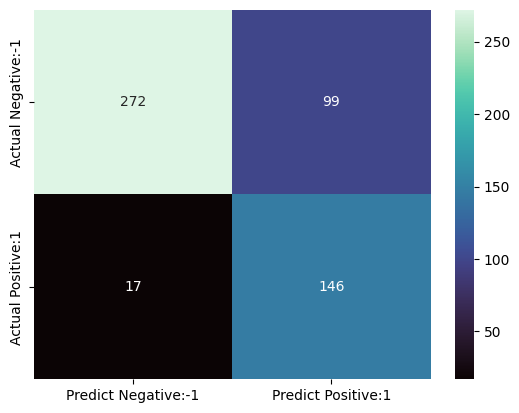

In [66]:
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Fine-tunning (40 points)

like what you did before, implement Soft Margin SVM but now use rbf kernel. To determine rbf $\gamma$ parameter use validation datas and find best(best by balanced accuracy) $\gamma$ between 0.001 , 0.01, 1, 10, 100. Not that you can't use ```scikit-learn``` library here.

In [67]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here
    distance = np.linalg.norm(x1 - x2) ** 2
    output = np.exp(-gamma * distance)
    return output

def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    """

    # TODO: Write your code here

    X = np.array(X)
    y = np.array(y)
    cnt = X.shape[0]


    K = np.zeros((cnt, cnt))
    for i in range(cnt):
        for j in range(cnt):

            K[i, j] = rbf(X[i], X[j], gamma)


    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(cnt))
    G = matrix(np.vstack((-np.eye(cnt), np.eye(cnt))))
    h = matrix(np.hstack((np.zeros(cnt), C * np.ones(cnt))))

    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    sol = solvers.qp(P, q, G, h, A, b)


    alphas = np.array(sol['x']).flatten()



    sv = (alphas > 4e-3)
    support_vectors = X[sv]
    support_vector_labels = y[sv]
    support_vector_alphas = alphas[sv]

    return support_vectors, support_vector_labels, support_vector_alphas




In [76]:
gammas = [00.1, 0.1, 1, 10, 100]
best_gamma = None
best_support_vectors = None
best_support_vector_labels = None
best_support_vector_alphas = None
best_balance_accuracy = -1



def bal(t, p):
    pos = np.sum(t == 1)
    neg = np.sum(t == -1)

    tp = np.sum((t == 1) & (p == 1))
    tn = np.sum((t == -1) & (p == -1))
    fp = neg - tn
    fn = pos - tp



    return (tp/ pos + tn/neg) / 2


for g in gammas:
    print(g)
    sv, svl, sva = soft_margin_svm(X_val, y_val, C, g)
    if len(sv) == 0:
        continue

    p = []
    for i in range(len(X_test)):

        pred = np.sign(np.sum(sva * svl * [rbf(X_test[i], x, g) for x in sv]))
        p.append(pred)

    res = bal(y_test, np.array(p))

    if res > best_balance_accuracy :
        best_balance_accuracy = res
        best_gamma = g
        best_support_vectors = sv
        best_support_vector_labels = svl
        best_support_vector_alphas = sva



print("Best gamma:", best_gamma)
print("Best balance accuracy:", best_balance_accuracy)

0.1
     pcost       dcost       gap    pres   dres
 0: -6.5732e+01 -6.1139e+02  2e+03  2e+00  7e-16
 1: -5.4381e+01 -3.3960e+02  3e+02  5e-02  7e-16
 2: -6.1842e+01 -1.0334e+02  4e+01  6e-03  6e-16
 3: -6.6921e+01 -7.6583e+01  1e+01  1e-03  5e-16
 4: -6.8287e+01 -7.1235e+01  3e+00  2e-04  5e-16
 5: -6.8795e+01 -6.9469e+01  7e-01  7e-06  6e-16
 6: -6.8925e+01 -6.9063e+01  1e-01  8e-07  5e-16
 7: -6.8960e+01 -6.8971e+01  1e-02  3e-08  6e-16
 8: -6.8963e+01 -6.8964e+01  3e-04  5e-10  5e-16
 9: -6.8963e+01 -6.8963e+01  6e-06  7e-12  5e-16
Optimal solution found.
0.1
     pcost       dcost       gap    pres   dres
 0: -6.5732e+01 -6.1139e+02  2e+03  2e+00  7e-16
 1: -5.4381e+01 -3.3960e+02  3e+02  5e-02  7e-16
 2: -6.1842e+01 -1.0334e+02  4e+01  6e-03  6e-16
 3: -6.6921e+01 -7.6583e+01  1e+01  1e-03  5e-16
 4: -6.8287e+01 -7.1235e+01  3e+00  2e-04  5e-16
 5: -6.8795e+01 -6.9469e+01  7e-01  7e-06  6e-16
 6: -6.8925e+01 -6.9063e+01  1e-01  8e-07  5e-16
 7: -6.8960e+01 -6.8971e+01  1e-02  3e-

In [77]:
y_pred = predict_labels(np.array(X_test), best_support_vectors, best_support_vector_labels, best_support_vector_alphas)
_, _, confusion_mat = evaluate(y_test, y_pred)

Accuracy: 0.8033707865168539
Balanced Accuracy: 0.8383551036897388
Confusion Matrix:
[[283  93]
 [ 12 146]]


# Multiclass SVM (30 points + 50 points optional)

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

In [80]:
path = "/content/satimage.csv"
df = pd.read_csv(path)
X = df.drop('label', axis=1)
y = df['label']
print(np.array(y))


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.625)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

[6. 6. 6. ... 6. 6. 6.]


In [81]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]
p = {'C': Cs, 'gamma': gammas}

s = SVC(kernel='rbf')

grid_s = GridSearchCV(estimator=s, param_grid=p, cv= 5)
grid_s.fit(X_train, y_train)

bc = grid_s.best_params_['C']
bg = grid_s.best_params_['gamma']
bs = SVC(kernel='rbf',  C=bc, gamma=bg)

bs.fit(X_train, y_train)

t = bs.predict(X_val)

acc = evaluate(y_val, t)



Accuracy: 0.9316062176165804
Balanced Accuracy: 0.9123345543101126
Confusion Matrix:
[[226   1   3   0   1   0]
 [  0 106   0   0   0   1]
 [  2   0 210   3   1   1]
 [  0   2   7  59   0  14]
 [  2   1   2   0 101   5]
 [  0   0   6  12   2 197]]


In [82]:
print(bc)
print(bg)

10
0.1


Implement Multiclass SVM from scratch without using ready functions (optional).

In [102]:
def MSVM(X, y, C=10):

    all = []
    c = np.unique(y)
    for col in c:
        #print(c)

        tmp = np.where(y == col, 1.0, -1.0)

        support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X, tmp, C)
        all.append((support_vectors, support_vector_labels, support_vector_alphas))

    return all, c

all, c = MSVM(X_train, y_train)


     pcost       dcost       gap    pres   dres
 0:  9.7912e+03 -1.8968e+05  4e+05  4e-01  9e-15
 1:  8.2391e+03 -3.2369e+04  4e+04  9e-03  4e-15
 2:  1.1309e+03 -5.6271e+03  7e+03  8e-04  7e-15
 3: -3.6312e+02 -1.1031e+03  7e+02  4e-13  4e-15
 4: -4.9444e+02 -5.6884e+02  7e+01  1e-13  1e-15
 5: -5.0503e+02 -5.2294e+02  2e+01  4e-14  6e-16
 6: -5.0774e+02 -5.1226e+02  5e+00  2e-15  4e-16
 7: -5.0858e+02 -5.0967e+02  1e+00  2e-14  4e-16
 8: -5.0879e+02 -5.0899e+02  2e-01  7e-15  3e-16
 9: -5.0884e+02 -5.0885e+02  1e-02  4e-14  4e-16
10: -5.0884e+02 -5.0884e+02  3e-04  1e-14  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.4422e+03 -1.0562e+05  2e+05  2e-01  9e-15
 1:  3.9867e+03 -1.5133e+04  2e+04  1e-02  4e-15
 2:  2.3792e+02 -2.5672e+03  3e+03  5e-13  6e-15
 3: -3.8016e+02 -6.8585e+02  3e+02  1e-13  3e-15
 4: -4.2668e+02 -4.6232e+02  4e+01  4e-14  1e-15
 5: -4.3232e+02 -4.3952e+02  7e+00  7e-15  4e-16
 6: -4.3360e+02 -4.3599e+02  2e+00  2e-14  2e-1

In [124]:
def predict(ans, c, X):
    cnt = X.shape[0]
    p = np.zeros((cnt, len(ans)))

    for i, (sv, l, al) in enumerate(ans):

        p[:, i] = [np.sum(al * l * rbf(x, sv, 0.01)) for x in X]

    return [c[np.argmax(i)] for i in p]


y_pred = predict(ans, c, X_test)

# Different SVM Kernels (40 points)

A kernel in SVM is like a tool that helps solve tricky problems. It lets us work in a space with many dimensions, making complex calculations easier. With kernels, we can deal with lots of dimensions, even an endless amount. Kernels are crucial for sorting data into groups and help spot patterns in the data we're looking at. They're especially good at tackling twisty problems with a straightforward approach.

Sometimes, finding a straight line or flat surface to divide data isn't possible, especially as we explore more dimensions. That's where different types of SVM kernels come in handy. They transform twisty, complicated data into a simpler form that's easier to separate. In this explanation, we talk about 4 popular types of these kernels. Also in following cells you can use any package.

<img src="./kernel.jpg" alt="Types of Kernel Functions"  align=center class="saturate">

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

Accuracy: 0.8707271597265382
Balanced Accuracy: 0.8386772216396241
Confusion Matrix:
[[354   0   3   0   4   0]
 [  0 181   0   0  12   0]
 [  2   1 308  15   0   1]
 [  0   0  23  74   2  39]
 [  6   7   1   3 150  18]
 [  0   0   7  52  12 334]]


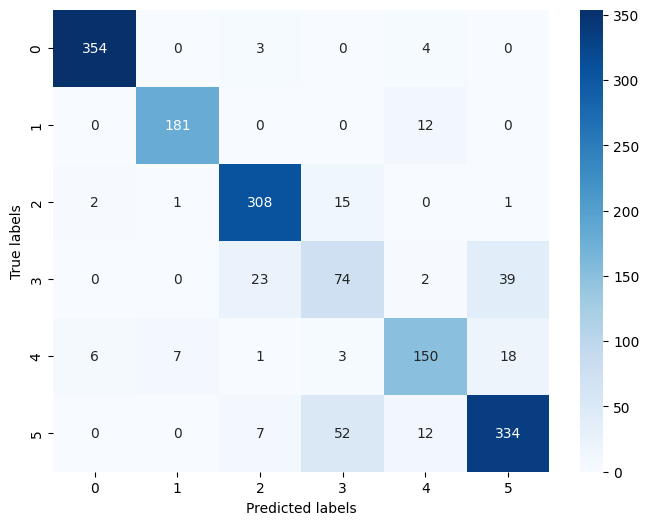

In [96]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

m = SVC(kernel='linear')
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
acc = evaluate(y_test, y_pred)


cm_linear = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part.

Accuracy: 0.8980733374766936
Balanced Accuracy: 0.872856371903639
Confusion Matrix:
[[356   1   2   0   2   0]
 [  0 189   0   0   4   0]
 [  2   1 316   4   1   3]
 [  0   0  26  83   3  26]
 [  6   2   0   3 159  15]
 [  0   0  15  42   6 342]]


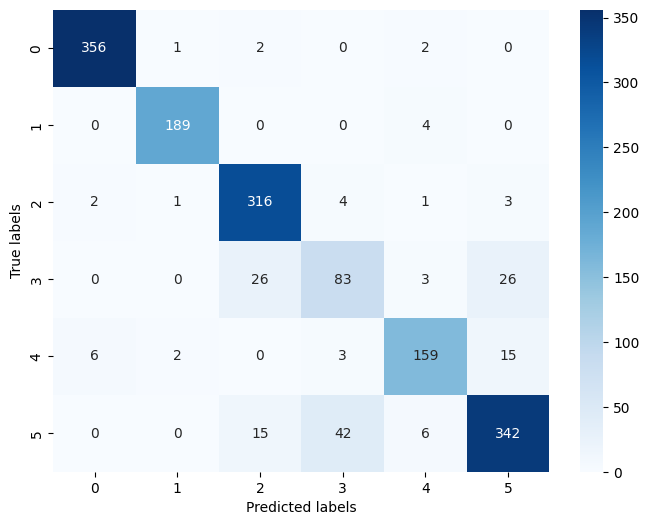

In [97]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


m = SVC(kernel='rbf')
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
acc = evaluate(y_test, y_pred)



cm_linear = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

Accuracy: 0.8508390304536979
Balanced Accuracy: 0.8298838068067815
Confusion Matrix:
[[358   1   2   0   0   0]
 [  3 184   0   4   1   1]
 [  5   1 296  22   0   3]
 [  6   0  16  95   0  21]
 [ 25   1   0  18 124  17]
 [  1   0   9  77   6 312]]


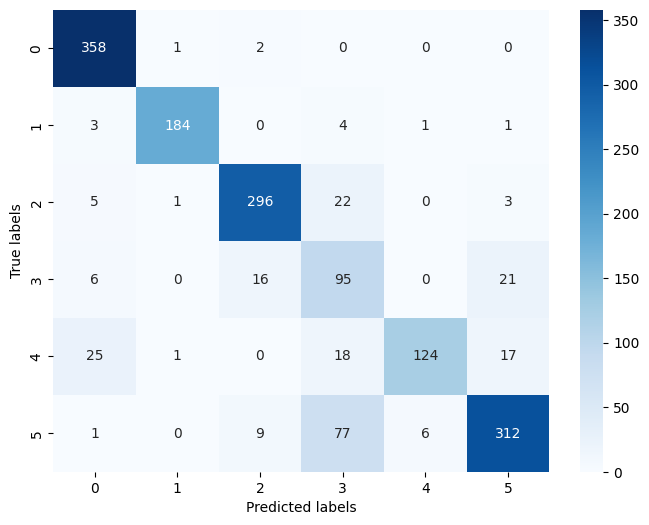

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


m = SVC(kernel='poly')
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
acc = evaluate(y_test, y_pred)


cm_linear = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

Accuracy: 0.7110006215040398
Balanced Accuracy: 0.6637537373498898
Confusion Matrix:
[[282   8  11   0  60   0]
 [ 37 152   0   2   2   0]
 [  2   1 300  22   0   2]
 [  1   1  27  46  14  49]
 [ 18  36   2  30  90   9]
 [  0   0  15  64  52 274]]


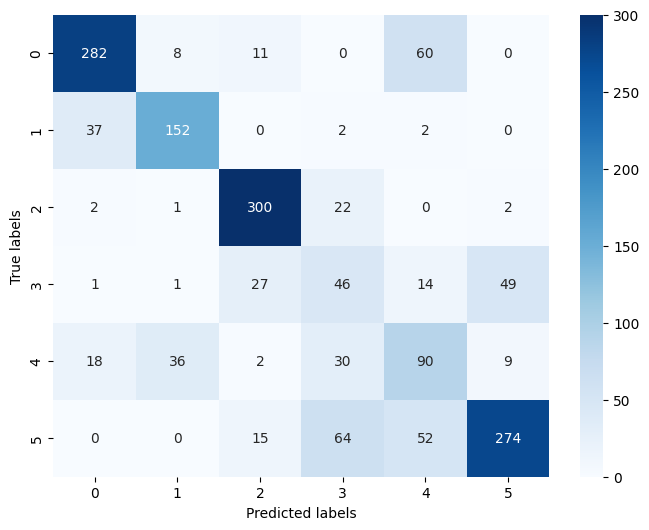

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


m = SVC(kernel='sigmoid')
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
acc = evaluate(y_test, y_pred)



cm_linear = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one?

from top acc:

Gaussian RBF >
Linear >
Polynomial >
Sigmoid




کرنل خطی برای فضاهایی که خطی تفکیک پذیرهستند مناسب است زیرا هم محاسبه سریعی دارد و هم در این فضاها خوب کار میکند ولی نمیتواند الگوهای پیچیده را یاد بگیرد.

کرنل گاوسی میتواند مدل های پیچیده را هم یاد بگیرد ولی هم هزینه محاسبه آن نسبتا بالا است هم ممکن است بیش از حد فیت شود.

از کرنل خطی بهتر میتواند مدل های پیچیده را مدل کند و هزینه محاسبه آن کرنل گاوسی کمتر است ولی نسبتا به داده های نویزی حساس است.

مدل سیگموید برای داده هایی که الگوهای نامشخصی دارند بهتر از سایرین عمل میکند ولی وابستگی زیادی به هایپرپارامترها دارد.